# Differential equations

Differential equations describe the dynamics of a system through how it changes given it's current state. Almost all fundamental laws of nature are of this type. In this course, we will encouter differential equations at almost every step. 

Some of these equations are ordinary differential equations. You should be familiar with those from previous classes. Other are partial differential equations, which you probably have encountered but which are a bit more advanced. We will work towards solving these equations by mapping them to systems of ordinary differential equations and solve them with the computer.

## Linear and exponential growth

### A simple (silly) example

![image.png](figures/bucket.png)

Consider a bucket to which you add 10ml of water per second. The amount of water in the bucket (lets call it $y(t)$) will increase over time as 
$$
y(t) = y_0 + t\times 10\frac{ml}{s}
$$
where $y_0$ is the initial amount of water. This is a simple example, but it will highlight some basic features of simple differential equations. 

This very same problem can be described as "the amount of water increases by 10ml/s" which is just a differential equation:

<font color='red'>
$$
\frac{dy}{dt} = 10\frac{ml}{s}
$$
</font>

The right hand side is a constant -- the rate of addition -- $\alpha=10\frac{ml}{s}$. Note that this constant has dimensions volume over time. These are the same dimensions as $\frac{dy}{dt}$ ($[y]=\mathrm{volume}$, $[t]=\mathrm{time}$) as it has to be. With every equation we consider, you should convince yourself that the dimensions match up!

### Direct integration
We have already written down the solution of the differential equation above. More formally, we can solve this equation by integrating both sides from $0\dots t$: 
$$
\int_0^t \frac{dy}{dt'} dt' = \int_0^t \alpha dt'
$$
The left hand side is
$$
\int_0^t \frac{dy}{dt'} dt' = y(t) - y(0)
$$
and hence simply the amount of water that was added between time 0 and time $t$. 

The right hand side is
$$
\int_0^t \alpha dt' = \alpha t
$$
Together with $y(0) = y_0$ we recover the solution given above. 

This is of course an extremely simple example, but it will teach us fundamental properties of differential equations
 * a differential equation describes how the system changes. We get to choose the initial condition $y(0)=y_0$
 * if the differential equation is such that the right hand side does not depend on $y$, we can integrate it directly.

### Solving differential equation with a computer
A differential equations are typically introduced as describing change in discrete little steps and then taking the limit to every smaller steps to define the differential equation. To solve differential equations with the computer, we do  have to keep these steps finite and the above problem turns into a finite difference equation

<font color=red>
$$
\frac{dy}{dt} = \alpha \quad \Rightarrow \quad \frac{\Delta y}{\Delta t} = \frac{y(t)- y (t-\Delta t)}{\Delta t} = \alpha
$$
</font>

For this example, we already know the answer. But learning how to solve ODEs with a computer will allow us to solve many equation to which no simple closed solution is known. It is therefore useful to explore how we would solve this equation numerically. 
The key idea is to rearrange the above equation as
$$
y(t) = y(t-\Delta t) + \alpha \Delta t
$$
We just start with $y(t) = y_0$ and add $\alpha \Delta t$ one step at a time. The computer will do this for us dutifully. 


In [9]:
y_0 = 3  # this is a quantity with units ml
t_0 = 0  # we start at 0 seconds
y = [y_0]   # this is the list in which we will gather y(t_0), y(t_1), y(t_2), etc
t = [t_0]   # this list will contain the time points t_0, t_1, t_2

alpha = 7  # this is in ml/s

Delta_t = 0.25 # discrete time intervals
n_steps = 100  # number of steps we want to integrate, the final time will be t_0 + n_steps*Delta_t



for i in range(n_steps):
    t.append(t[i] + Delta_t)  # the new time t_[i+1] = t_[i]+Delta_t
    y.append(y[i] + alpha*Delta_t)  # the new time y_[i+1] = y_[i]+alpha*Delta_t

print("The first 10 time points:", t[:10])
print("The first 10 time values:", y[:10])

The first 10 time points: [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25]
The first 10 time values: [3, 4.75, 6.5, 8.25, 10.0, 11.75, 13.5, 15.25, 17.0, 18.75]


### Lets graph these results!

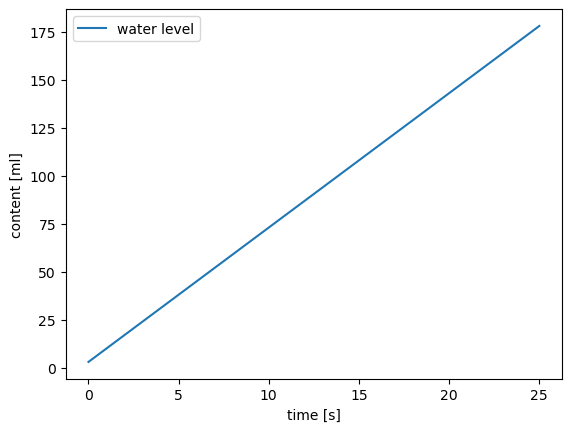

In [10]:
import matplotlib.pyplot as plt

plt.plot(t, y, label='water level')
plt.xlabel('time [s]')  # label axis and specify units!
plt.ylabel('content [ml]')
plt.legend()

### A leaky bucket

now, let's assume the bucket as a leak and that the rate at which water is lost is proportional to the pressure and thus the water level $y$. We can therefore parameterize this leak as $\beta y(t)$ where $\beta$ is the leakage rate. 

This changes the ODE to 
$$
\frac{d y}{dt} = \alpha - \beta y
$$



In [11]:
y_0 = 20  # this is a quantity with units ml
t_0 = 0  # we start at 0 seconds
y = [y_0]   # this is the list in which we will gather y(t_0), y(t_1), y(t_2), etc
t = [t_0]   # this list will contain the time points t_0, t_1, t_2

alpha = 7  # this is in ml/s
beta = 0.5 # is is just 1/s

Delta_t = 0.25 # discrete time intervals
n_steps = 100  # number of steps we want to integrate, the final time will be t_0 + n_steps*Delta_t

def dydt(y, alpha, beta):
    return alpha - beta*y

for i in range(n_steps):
    t.append(t[i] + Delta_t)  # the new time t_[i+1] = t_[i]+Delta_t
    y.append(y[i] + dydt(y[i], alpha, beta)*Delta_t)  # the new time y_[i+1] = y_[i]+alpha*Delta_t

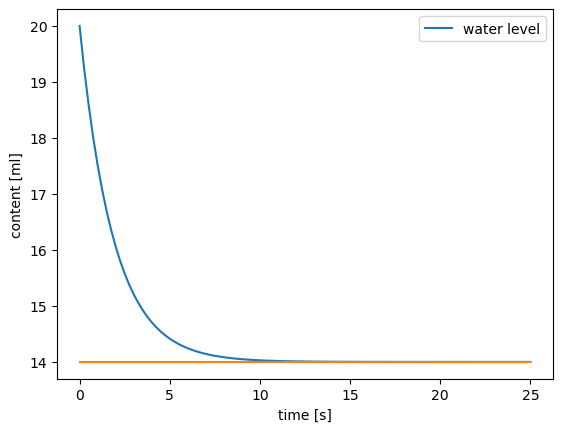

In [12]:
plt.plot(t, y, label='water level')
plt.plot([0,t[-1]], [alpha/beta, alpha/beta])
plt.xlabel('time [s]')  # label axis and specify units!
plt.ylabel('content [ml]')
plt.legend()

# Newton's law and the harmonic oscillator
Now consider a particle attached to a spring such that the force acting on the particle is $F = -\gamma x$.
This means that for $x>0$, the force is pulling to the left (towards smaller $x$) and in the opposite direction for $x<0$.
Such a situation is similar to a pendulum, a marble in a bowl, or a particle in a laser trap (optical tweezer) used for single molecule experiments.
In addition to this force acting on the particle, there might also be a friction force.
Friction is typically proportional to the velocity itself $\eta v$.
Combining these two contributions, we find that this system is described by
\begin{equation}
    \begin{split}
        \frac{dx}{dt} & = v \\
        \frac{dv}{dt} & = -\frac{1}{m} \left( x\gamma +  \eta v\right)\\
    \end{split}
\end{equation}
We will now proceed and solve this system numerically. 

These equations have exact solutions as well and I encourage those more mathematically inclined to try and solve them.

In [5]:
def dx_dv(x,v, m, gamma, eta):
    return v, -(x*gamma + eta*v)/m

x = 1
v = 0
m = 1
gamma = 1
eta = 10.5

t=0
dt=0.01
tmax = 20
x_list = [x]
v_list = [v]
t_list = [t]

while t<tmax:
    dx, dv = dx_dv(x,v,m,gamma, eta)
    x += dt*dx
    x_list.append(x)
    v += dt*dv
    v_list.append(v)
    t += dt
    t_list.append(t)

Text(0.5, 0, 'time')

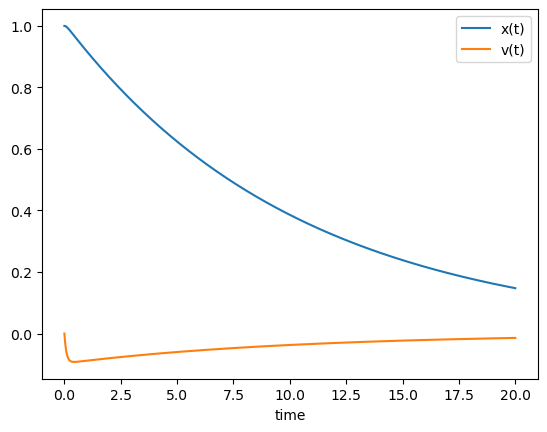

In [6]:
plt.plot(t_list, x_list, label='x(t)')
plt.plot(t_list, v_list, label='v(t)')
plt.legend()
plt.xlabel('time')

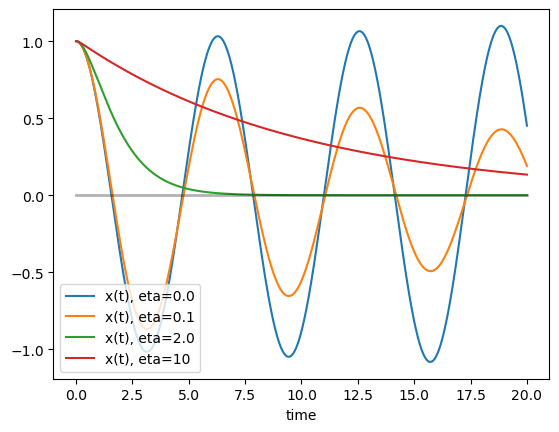

In [7]:
def harmonic_trajectory(x,v, tmax, m, gamma, eta):
    t=0
    dt=0.01
    x_list = [x]
    v_list = [v]
    t_list = [t]

    while t<tmax:
        dx, dv = dx_dv(x,v,m,gamma, eta)
        x += dt*dx
        x_list.append(x)
        v += dt*dv
        v_list.append(v)
        t += dt
        t_list.append(t)
    return x_list, v_list, t_list

for eta in [0.0, 0.1, 2.0, 10]:
    x,v,t = harmonic_trajectory(1.0, 0.0, 20, 1.0, 1.0, eta)
    
    plt.plot(t, x, label=f'x(t), eta={eta}')
    #plt.plot(t, v, label=f'v(t), eta={eta}')

plt.plot([0,20], [0,0], alpha=0.3, lw=2, c='black')
plt.xlabel('time')
plt.legend(loc=3)
plt.savefig('harmonic.pdf')

### Over-damped limit

If the mass of particles is small the forces need to accellerate a body are small and negligible in comparison to other forces like friction. 

To explore the consequences of this, we multiply the equation for the velocity (with $F=-\gamma x$) by $m$ to obtain
$$
  m\frac{dv}{dt}  = F - \eta v
$$
If $m$ is very small, the left hand side is approximately 0. This means that the two terms on the right hand side balance approximately
$$
F - \eta v \approx 0
$$
and this $v\approx F/\eta$. In other words, velocity is determined by an almost instantaneous balance between the external force and friction.

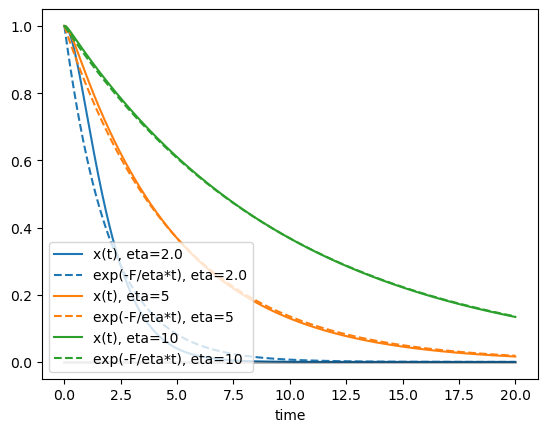

In [8]:
import numpy as np
for ei, eta in enumerate([2.0, 5, 10]):
    x,v,t = harmonic_trajectory(1.0, 0.0, 20, 1.0, 1.0, eta)
    
    plt.plot(t, x, label=f'x(t), eta={eta}', c=f'C{ei}')
    plt.plot(t, np.exp(-1.0/eta*np.array(t)), label=f'exp(-F/eta*t), eta={eta}',c=f'C{ei}', ls='--')
    #plt.plot(t, v, label=f'v(t), eta={eta}', c=f'C{ei}')
    #plt.plot(t, -gamma*np.array(x)/eta, label=f'v(t), eta={eta}', c=f'C{ei}', ls='--')

plt.plot([0,20], [0,0], alpha=0.3, lw=2, c='black')
plt.xlabel('time')
plt.legend(loc=3)



### Friction and viscosity

Friction is higher in more viscous medium, e.g. honey compared to water. So what exactly is viscosity? If you are curious, read up on [viscosity on wikipedia](https://en.wikipedia.org/wiki/Viscosity#Simple_definition).

![image.png](figures/friction.png)

$$
F \sim \frac{Av}{d}  \quad \Rightarrow \quad F  = \eta \frac{Av}{d}
$$

Viscosity $\eta$ is the proportionality constant linking movement of molecules to frictional force.

Viscosity has dimension 

$$
[\eta] = \left[ \frac{Fd}{Av}\right] = \frac{energy \times time}{volume} = \frac{force \times time}{area}
$$

Viscosity is typically measured in $N s/m^2$ and relevant values for us are

 * water: $0.001 \frac{Ns}{m^2}$
 * cytosol: $0.003 \frac{Ns}{m^2}$
 



## Friction forces on a particle
If we pull a sphere through a medium with viscosity $\eta$, what will the required force depend on?

 - viscosity: the higher the viscosity, the higher the required force
 - velocity: the faster, the higher the required force. 
 - size: the bigger the object, the larger the force. 
 
So how do these quantities determine the force exactly? It turns out there is only one way to combine them such that the result has the dimensions of a force:

$$
F \sim \eta v r \quad \mathrm{since}\quad [N] \sim \left[\frac{N s}{m^2}\right]\times \left[\frac{m}{s}\right]\times[m]
$$
Up to a prefactor, this is the famous [Stokes' law](https://en.wikipedia.org/wiki/Stokes'_law). Stokes calculated that for a sphere, the relationship between frictional force, size, velocity and viscosity is given by 
$$
F = 6\pi \eta v r
$$


### How fast could molecular motors move cargo in principle?

We discussed earlier that molecular motors exert forces in the pico-newton range (say 5pN). With that force, how fast can one pull a vesicle of 100nm radius through the cytosol?
$$
v = \frac{F}{6\pi \eta r} \approx \frac{5\times 10^{-12}N m^2}{20 0.003 N s 10^{-7}m} = \frac{10^{-5}m}{0.012s} \approx 0.001 \frac{m}{s}
$$
